In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
import pandas as pd
import mne
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf
from mne.time_frequency import tfr_multitaper
from mne.stats import permutation_cluster_1samp_test as pcluster_test

In [2]:
'''
read_raw_filename = 'data/B0101T.gdf'
save_epo_filename = 'data/B0101T_left_right_epo.fif'

raw = mne.io.read_raw_gdf(read_raw_filename, preload=True)

raw.drop_channels(['EOG:ch01','EOG:ch02','EOG:ch03'])

# 768 --- start a trial
custom_mapping = {'769':3,'770':4}
(events_from_annot,event_dict) = mne.events_from_annotations(raw, event_id=custom_mapping)
#  3s开始为时间cue
raw_epochs = mne.Epochs(raw, events=events_from_annot, event_id=event_dict,proj=True,baseline=(None, 0), preload=True,tmin=-2,tmax=6)

evoked = raw_epochs.average()
evoked.plot(time_unit='s')

raw_epochs.save(save_epo_filename)
'''

"\nread_raw_filename = 'data/B0101T.gdf'\nsave_epo_filename = 'data/B0101T_left_right_epo.fif'\n\nraw = mne.io.read_raw_gdf(read_raw_filename, preload=True)\n\nraw.drop_channels(['EOG:ch01','EOG:ch02','EOG:ch03'])\n\n# 768 --- start a trial\ncustom_mapping = {'769':3,'770':4}\n(events_from_annot,event_dict) = mne.events_from_annotations(raw, event_id=custom_mapping)\n#  3s开始为时间cue\nraw_epochs = mne.Epochs(raw, events=events_from_annot, event_id=event_dict,proj=True,baseline=(None, 0), preload=True,tmin=-2,tmax=6)\n\nevoked = raw_epochs.average()\nevoked.plot(time_unit='s')\n\nraw_epochs.save(save_epo_filename)\n"

In [3]:
filename = 'data/B0101T_epo.fif'
epochs = mne.read_epochs(filename)

Reading e:\19_BCIexperiment\02_CodeTest\MNE_TEST\data\B0101T_epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -500.00 ...    7000.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated


In [4]:
epochs.info

<Info | 9 non-empty values
 bads: []
 ch_names: EEG:C3, EEG:Cz, EEG:C4
 chs: 3 EEG
 custom_ref_applied: False
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2005-10-25 09:35:11 UTC
 meas_id: 4 items (dict)
 nchan: 3
 projs: []
 sfreq: 250.0 Hz
>

In [5]:
tmin = 2
tmax = 7

freqs = np.arange(2, 36)  # frequencies from 2-35Hz
vmin, vmax = -1, 1.5  # set min and max ERDS values in plot
baseline = [2, 3]  # baseline interval (in s)
cnorm = TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)  # min, center & max ERDS

kwargs = dict(n_permutations=100, step_down_p=0.05, seed=1,
              buffer_size=None, out_type='mask')  # for cluster test

In [6]:
tfr = tfr_multitaper(epochs, freqs=freqs, n_cycles=freqs, use_fft=True,
                     return_itc=False, average=False, decim=2)
tfr.crop(tmin, tmax).apply_baseline(baseline, mode="percent")

Not setting metadata
Applying baseline correction (mode: percent)


<EpochsTFR | time : [1.996000, 6.996000], freq : [2.000000, 35.000000], epochs : 120, channels : 3, ~58.5 MB>

In [7]:
tfr.info

<Info | 9 non-empty values
 bads: []
 ch_names: EEG:C3, EEG:Cz, EEG:C4
 chs: 3 EEG
 custom_ref_applied: False
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2005-10-25 09:35:11 UTC
 meas_id: 4 items (dict)
 nchan: 3
 projs: []
 sfreq: 125.0 Hz
>

In [8]:
from scipy.io import loadmat
filename1 = 'data/B0101T.mat'
raw_label_data = loadmat(filename1)
B0101T_label = raw_label_data['classlabel']

In [9]:
cls1 = B0101T_label==1

In [10]:
B0101T_label==1

array([[ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [

In [11]:
B0101T_label==1

array([[ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [

In [12]:
cnt = 0
idx0 = []
for i in B0101T_label:
    if i == 1:
        idx0.append(cnt)
    cnt += 1

In [13]:
cnt = 0
idx1 = []
for i in B0101T_label:
    if i == 2:
        idx1.append(cnt)
    cnt += 1

In [14]:
tfr[idx0]


<EpochsTFR | time : [1.996000, 6.996000], freq : [2.000000, 35.000000], epochs : 60, channels : 3, ~29.2 MB>

Using a threshold of 1.671093
stat_fun(H1): min=-10.628489 max=4.182284
Running initial clustering
Found 17 clusters
Permuting 99 times...


100%|██████████|  : 99/99 [00:01<00:00,   85.50it/s]


Computing cluster p-values
Step-down-in-jumps iteration #1 found 2 clusters to exclude from subsequent iterations
Permuting 99 times...


100%|██████████|  : 99/99 [00:01<00:00,   88.08it/s]


Computing cluster p-values
Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Done.
Using a threshold of -1.671093
stat_fun(H1): min=-10.628489 max=4.182284
Running initial clustering
Found 28 clusters
Permuting 99 times...


100%|██████████|  : 99/99 [00:01<00:00,   87.54it/s]

Computing cluster p-values
Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
Done.
No baseline correction applied
Using a threshold of 1.671093
stat_fun(H1): min=-7.831124 max=4.757428
Running initial clustering
Found 30 clusters
Permuting 99 times...



100%|██████████|  : 99/99 [00:01<00:00,   83.49it/s]


Computing cluster p-values
Step-down-in-jumps iteration #1 found 3 clusters to exclude from subsequent iterations
Permuting 99 times...


100%|██████████|  : 99/99 [00:01<00:00,   88.55it/s]

Computing cluster p-values
Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Done.
Using a threshold of -1.671093
stat_fun(H1): min=-7.831124 max=4.757428
Running initial clustering
Found 35 clusters
Permuting 99 times...



100%|██████████|  : 99/99 [00:01<00:00,   88.79it/s]


Computing cluster p-values
Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
Done.
No baseline correction applied
Using a threshold of 1.671093
stat_fun(H1): min=-11.569873 max=4.343485
Running initial clustering
Found 31 clusters
Permuting 99 times...


100%|██████████|  : 99/99 [00:01<00:00,   86.62it/s]


Computing cluster p-values
Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations
Permuting 99 times...


100%|██████████|  : 99/99 [00:01<00:00,   86.39it/s]


Computing cluster p-values
Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Done.
Using a threshold of -1.671093
stat_fun(H1): min=-11.569873 max=4.343485
Running initial clustering
Found 33 clusters
Permuting 99 times...


100%|██████████|  : 99/99 [00:01<00:00,   88.00it/s]


Computing cluster p-values
Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations
Permuting 99 times...


100%|██████████|  : 99/99 [00:01<00:00,   85.43it/s]


Computing cluster p-values
Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Done.
No baseline correction applied


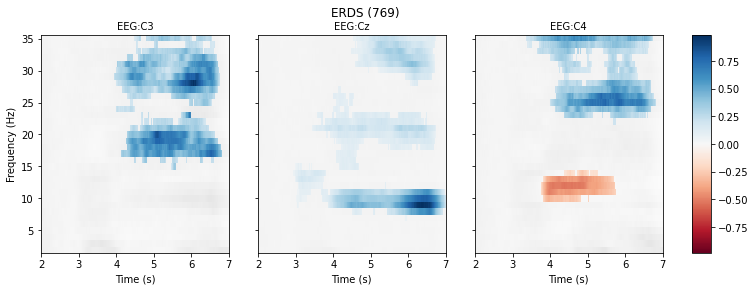

In [15]:
tfr_ev = tfr[idx0]
fig, axes = plt.subplots(1, 4, figsize=(12, 4),
                            gridspec_kw={"width_ratios": [10, 10, 10, 1]})
for ch, ax in enumerate(axes[:-1]):  # for each channel
    # positive clusters
    _, c1, p1, _ = pcluster_test(tfr_ev.data[:, ch], tail=1, **kwargs)
    # negative clusters
    _, c2, p2, _ = pcluster_test(tfr_ev.data[:, ch], tail=-1, **kwargs)

    # note that we keep clusters with p <= 0.05 from the combined clusters
    # of two independent tests; in this example, we do not correct for
    # these two comparisons
    c = np.stack(c1 + c2, axis=2)  # combined clusters
    p = np.concatenate((p1, p2))  # combined p-values
    mask = c[..., p <= 0.05].any(axis=-1)

    # plot TFR (ERDS map with masking)
    tfr_ev.average().plot([ch], cmap="RdBu", cnorm=cnorm, axes=ax,
                            colorbar=False, show=False, mask=mask,
                            mask_style="mask")

    ax.set_title(epochs.ch_names[ch], fontsize=10)
    ax.axvline(0, linewidth=1, color="black", linestyle=":")  # event
    if ch != 0:
        ax.set_ylabel("")
        ax.set_yticklabels("")
fig.colorbar(axes[0].images[-1], cax=axes[-1]).ax.set_yscale("linear")
fig.suptitle(f"ERDS (769)")
plt.show()

Using a threshold of 1.671093
stat_fun(H1): min=-10.322176 max=4.043747
Running initial clustering
Found 32 clusters
Permuting 99 times...


100%|██████████|  : 99/99 [00:01<00:00,   87.84it/s]


Computing cluster p-values
Step-down-in-jumps iteration #1 found 2 clusters to exclude from subsequent iterations
Permuting 99 times...


100%|██████████|  : 99/99 [00:01<00:00,   87.30it/s]


Computing cluster p-values
Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Done.
Using a threshold of -1.671093
stat_fun(H1): min=-10.322176 max=4.043747
Running initial clustering
Found 44 clusters
Permuting 99 times...


100%|██████████|  : 99/99 [00:01<00:00,   80.11it/s]


Computing cluster p-values
Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations
Permuting 99 times...


100%|██████████|  : 99/99 [00:01<00:00,   84.41it/s]

Computing cluster p-values
Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Done.
No baseline correction applied
Using a threshold of 1.671093
stat_fun(H1): min=-10.868372 max=6.000414
Running initial clustering
Found 23 clusters
Permuting 99 times...



100%|██████████|  : 99/99 [00:01<00:00,   85.35it/s]


Computing cluster p-values
Step-down-in-jumps iteration #1 found 2 clusters to exclude from subsequent iterations
Permuting 99 times...


100%|██████████|  : 99/99 [00:01<00:00,   87.22it/s]


Computing cluster p-values
Step-down-in-jumps iteration #2 found 1 additional cluster to exclude from subsequent iterations
Permuting 99 times...


100%|██████████|  : 99/99 [00:01<00:00,   87.23it/s]


Computing cluster p-values
Step-down-in-jumps iteration #3 found 0 additional clusters to exclude from subsequent iterations
Done.
Using a threshold of -1.671093
stat_fun(H1): min=-10.868372 max=6.000414
Running initial clustering
Found 46 clusters
Permuting 99 times...


100%|██████████|  : 99/99 [00:01<00:00,   86.16it/s]


Computing cluster p-values
Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
Done.
No baseline correction applied
Using a threshold of 1.671093
stat_fun(H1): min=-7.557052 max=4.993608
Running initial clustering
Found 36 clusters
Permuting 99 times...


100%|██████████|  : 99/99 [00:01<00:00,   85.20it/s]


Computing cluster p-values
Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations
Permuting 99 times...


100%|██████████|  : 99/99 [00:01<00:00,   89.11it/s]


Computing cluster p-values
Step-down-in-jumps iteration #2 found 1 additional cluster to exclude from subsequent iterations
Permuting 99 times...


100%|██████████|  : 99/99 [00:01<00:00,   89.91it/s]


Computing cluster p-values
Step-down-in-jumps iteration #3 found 0 additional clusters to exclude from subsequent iterations
Done.
Using a threshold of -1.671093
stat_fun(H1): min=-7.557052 max=4.993608
Running initial clustering
Found 34 clusters
Permuting 99 times...


100%|██████████|  : 99/99 [00:01<00:00,   79.73it/s]


Computing cluster p-values
Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
Done.
No baseline correction applied


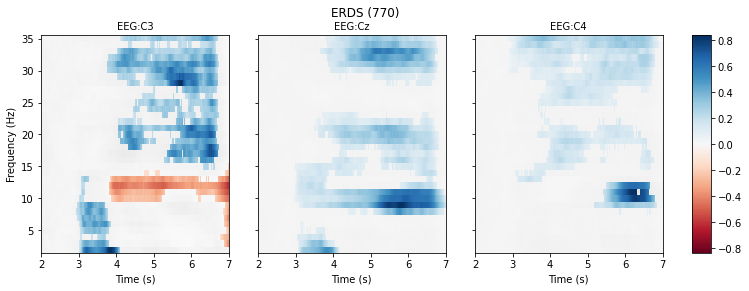

In [16]:
tfr_ev = tfr[idx1]
fig, axes = plt.subplots(1, 4, figsize=(12, 4),
                            gridspec_kw={"width_ratios": [10, 10, 10, 1]})
for ch, ax in enumerate(axes[:-1]):  # for each channel
    # positive clusters
    _, c1, p1, _ = pcluster_test(tfr_ev.data[:, ch], tail=1, **kwargs)
    # negative clusters
    _, c2, p2, _ = pcluster_test(tfr_ev.data[:, ch], tail=-1, **kwargs)

    # note that we keep clusters with p <= 0.05 from the combined clusters
    # of two independent tests; in this example, we do not correct for
    # these two comparisons
    c = np.stack(c1 + c2, axis=2)  # combined clusters
    p = np.concatenate((p1, p2))  # combined p-values
    mask = c[..., p <= 0.05].any(axis=-1)

    # plot TFR (ERDS map with masking)
    tfr_ev.average().plot([ch], cmap="RdBu", cnorm=cnorm, axes=ax,
                            colorbar=False, show=False, mask=mask,
                            mask_style="mask")

    ax.set_title(epochs.ch_names[ch], fontsize=10)
    ax.axvline(0, linewidth=1, color="black", linestyle=":")  # event
    if ch != 0:
        ax.set_ylabel("")
        ax.set_yticklabels("")
fig.colorbar(axes[0].images[-1], cax=axes[-1]).ax.set_yscale("linear")
fig.suptitle(f"ERDS (770)")
plt.show()

No baseline correction applied


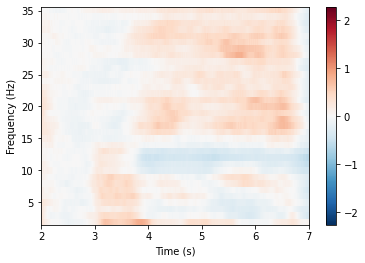

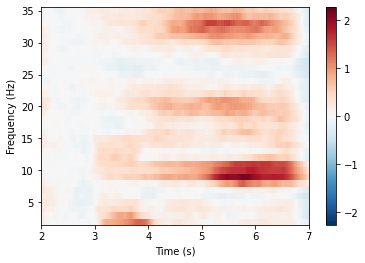

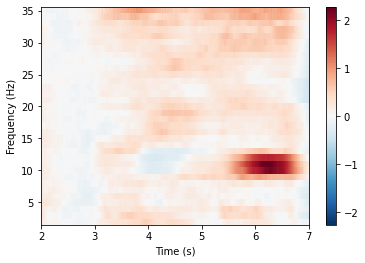

[<Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>]

In [17]:
tfr_ev.average().plot()

In [18]:
tfr_ev = tfr['770'][0]
tfr_ev.average().plot()

KeyError: 'Event "770" is not in Epochs. Event_ids must be one of "768"'

In [ ]:
tfr_ev = tfr['769']
tfr_ev.average().plot()

In [ ]:
tfr_ev = tfr['769'][0]
tfr_ev.average().plot()

In [19]:
df = tfr.to_data_frame(time_format=None)


In [20]:
aa  = df.values
print(aa.shape)

(2554080, 7)


In [22]:
epoch_0

,time,freq,epoch,condition,EEG:C3,EEG:Cz,EEG:C4
21284,1.996,2.0,1,768,0.115601,-0.457312,0.216274
21285,2.004,2.0,1,768,0.059644,-0.456216,0.217999
21286,2.012,2.0,1,768,-0.000814,-0.456245,0.217286
21287,2.020,2.0,1,768,-0.069548,-0.457248,0.214321
21288,2.028,2.0,1,768,-0.113068,-0.457320,0.218008
...,...,...,...,...,...,...,...
42563,6.964,35.0,1,768,-0.119541,-0.539983,-0.187130
42564,6.972,35.0,1,768,0.087720,-0.513390,0.209600
42565,6.980,35.0,1,768,0.034578,-0.507449,-0.114230
42566,6.988,35.0,1,768,-0.043934,-0.497736,-0.411330


(68, 626)


In [60]:
idx0



[0,
 2,
 8,
 11,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 24,
 25,
 26,
 29,
 30,
 35,
 38,
 40,
 41,
 42,
 43,
 48,
 49,
 52,
 56,
 57,
 59,
 60,
 61,
 64,
 67,
 68,
 69,
 75,
 76,
 77,
 78,
 80,
 81,
 83,
 86,
 87,
 93,
 94,
 95,
 97,
 99,
 100,
 104,
 105,
 107,
 108,
 109,
 111,
 113,
 115,
 117]

In [67]:
idx1

[1,
 3,
 4,
 5,
 6,
 7,
 9,
 10,
 12,
 13,
 23,
 27,
 28,
 31,
 32,
 33,
 34,
 36,
 37,
 39,
 44,
 45,
 46,
 47,
 50,
 51,
 53,
 54,
 55,
 58,
 62,
 63,
 65,
 66,
 70,
 71,
 72,
 73,
 74,
 79,
 82,
 84,
 85,
 88,
 89,
 90,
 91,
 92,
 96,
 98,
 101,
 102,
 103,
 106,
 110,
 112,
 114,
 116,
 118,
 119]

(68, 626)


Text(0.5, 1.0, '8 [False]')

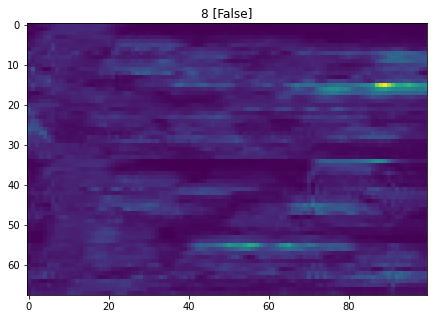

In [83]:
epo = 8
epoch_0 = df.loc[df['epoch'] == epo]
C3= epoch_0['EEG:C3']
C4= epoch_0['EEG:C4']
data = np.concatenate((C3.values.reshape(34,-1),C4.values.reshape(34,-1)))
print(data.shape)
x = np.linspace(1,625,100,dtype=np.int32)
fig = plt.figure(figsize=(12,5))
plt.imshow(data[:,x])
plt.title(str(epo)+' '+str(B0101T_label[epo]==2))


In [26]:
epoch_0_fre5 = epoch_0.loc[epoch_0['freq'] == 5.0]

In [27]:
epoch_0_fre5.shape

(626, 7)

In [ ]:
epoch_0_fre5_downsampling = epoch_0_fre5[:]

In [ ]:
data = np.array(df)

In [ ]:
data.shape